# Generalities
**Author : Sebastien Fromenteau**

**context : Mexican AstroCosmology Statistics School 2017**

This notebook is partially based on the notebook wrote by Iván Rodríguez Montoya for MACSS 2016
I will not focus on list and pure python part which not use Numpy library considering that most of the stuff we need in high energy physics is include in it. Moreover, the benchmark of pure python (without cython or numpy) is pretty bad.

The idea of these 4 hours is to understand the following:

    -Types of variables (int, float, string, bool, complex.... )
    -use modules    (we will principally use numpy, scipy and  matplotlib)
    -use logical tests : ==, <, >, <=, >=, !=, is, is not  +  (not, or, and) 
    -use loops : for, while
    -use conditional : if, then, else
    -use arrays (declare, move on it, use numpy matrix utilities)
    -generate randoms
    -read and save a file using numpy.loadtxt and numpy.savetxt
    -generate plots with matplotlib.pyplot (plot, semilog, loglog, scatter,fillbetween, histogram.....)
    -define a function and use it


 

## Fisrt step

A language use types of variables. In python, like in many others languages, it is implicit. You can declare a variable just ascociating a value. 

In [252]:
a = 1
b = 2.67
c = "Vamos PSG"
d = True

print type(a), type(b), type(c), type(d)

<type 'int'> <type 'float'> <type 'str'> <type 'bool'>


But you can change the type just ascociating another type of values

In [253]:
b = 2
d = 4.+67j

print type(a), type(b), type(c), type(d)

<type 'int'> <type 'int'> <type 'str'> <type 'complex'>


That's pretty convenient but really dangerous if you are not rigorous. When your code start to be long, you can overwrite a a variable you already declare. Sometimes, the error will not be straightforward to detect (and maybe you will not see that there is a problem). So, you have to choose names which are clear enough. For example, all my arrays have a name like 'dist_arr', 'energy_arr', 'x_arr'..... and I try to comment the reason of this variable:

In [254]:

vel_y_init = 10.   ###### Initial velocity expressed in m/s along the y-axis
vel_x_init = 5. ###### Initial velocity expressed in m/s along the x-axis
pos_x_init = 0. ###### Initial position in meters for the x-axis
pos_y_init = 0. ###### Initial position in meters for the y-axis




### List and tupples

I have to introduce list but I will never really use it. A list is list of objects which can have different type. It can be useful for some stuff but in general I  do not use it and it's a very bad idea to use it like an array creating a list of float-type elements. It is powerful to manage data structure with diferent type and size elements (more like a linked chain). It can look similar to an array but is totally different. An array, is well difined in term of size since the beginning and can manage one type at once. Moreover, the storage in contigous (compact). if you know the position in the memory (adress) of the first element and the type, then you can move inside the array changing memory adress pointer like:

    array[ i ] = contain_of(adress(array[0]) + i * size_of(type(array[0])) )

When you manage big data, you have to manage the RAM storage (memory) as well as the cpu time. List and arrays are very different for these two concerns. Finally, you can use very eficient way to manipulate arrays to do calculations that you can not do with lists. So, to calculation stuff it will be more useful to focus on numpy.ndarray type here.

By the way, the list constructor is '[ ]'. A list definition is as easy as:

In [255]:
mylist = ['a', 'psg', [1,2,3], True]
print type(mylist)
print
print "We can see the type of each eelement of the list"
print
for i in range(len(mylist)) : print type(mylist[i])     ###print the type of each element : see below to "for" explainations

<type 'list'>

We can see the type of each eelement of the list

<type 'str'>
<type 'str'>
<type 'list'>
<type 'bool'>


As we can see, an element of a list can be a list itself. So [1,2,4] is not an array of integer bu a list of 3 elements which are the same type. We will see that Numpy have a method (np.array) which allow to transform a list like [1,2,4] to an array of integer. 

The tuples are similar to the list but you can not modify once it exist.


In [256]:
##### Print the initial list


mylist = [1,2,4]
print mylist


#### Add element at the end of the list

print "APPEND"
mylist.append('append')
print mylist

#### Remove element at the end of the list

print "POP"
mylist.pop()
print mylist

#### Add element at index position of the list

print "INSERT 2"
mylist.insert(2, 'insert')
print mylist

#### remove element at index position of the list

print "REMOVE 2"
mylist.remove(2)
print mylist

[1, 2, 4]
APPEND
[1, 2, 4, 'append']
POP
[1, 2, 4]
INSERT 2
[1, 2, 'insert', 4]
REMOVE 2
[1, 'insert', 4]


## arrays and modules

One of the most common and useful object in programation is the array. We will use the Numpy array here. So we will need to load the module Numpy first and then use the relevant method to create the arrays.

Like C or Fortran, we can load modules/Libraries and then use it. With Python it's similar to load an object with all its methods associated accessible using obj_name.method . Using Jupyter-notebook, we can use the very very useful completion using "tabulation". if you write "np." and use the completion you will have the proposition of all associated methods.

For example, we will load Numpy in an obj_name "np" (like most of the people) and use the different methods:

    -zeros
    -linspace
    -arange
    -array


In [257]:
import numpy as np   ###We load (import) the module numpy and we will use it with the obj_name np (you can change obj_name)

size_arr = 10   ##### 



print "np.zeros()"
arr1 = np.zeros( size_arr  )   #### generate an array with 0 values with size = size_arr
print 'arr1 = ', arr1

##By default, the type is "float". But you can specify the type. This is true for all np.methods
print "np.linspace()"
arr2 = np.linspace(1., 10, size_arr) #### generate an array of size size_arr with min value = 1. and max =10.
print 'arr2 = ', arr2
###Test with other values
print
print 'test with other values :', np.linspace(0.23, 154.1, size_arr)
print

print "np.arange()"
arr3 = np.arange(0, size_arr, 1)
print 'arr3 = ', arr3
print "As you can see, the last element is 9 and not 10. It's useful to generate indices of an array of size 10 for example"

print "np.array()"
####Here we apply the method numpy.array() to the list [1,2,4]. The result is an array of integer (numpy.int64 type to be complet)
mylist = [1,2,4]
arr4 = np.array(mylist)
print type(arr4[0])

arr5 = np.array(mylist, np.float32)
print type(arr5[0])

np.zeros()
arr1 =  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
np.linspace()
arr2 =  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]

test with other values : [   0.23         17.32666667   34.42333333   51.52         68.61666667
   85.71333333  102.81        119.90666667  137.00333333  154.1       ]

np.arange()
arr3 =  [0 1 2 3 4 5 6 7 8 9]
As you can see, the last element is 9 and not 10. It's useful to generate indices of an array of size 10 for example
np.array()
<type 'numpy.int64'>
<type 'numpy.float32'>


## Nd-arrays and Matrices

An array can have more than 1-dimension and in this case it will be numpy.ndarray . A 2D ndarray can be converted in numpy matrix type which is useful to apply matrix calculation. We will see a typical example using dot product between matrices and arrays.




In [258]:
import numpy as np

size_x = 15
size_y = 10


#### 
print "twoD_arr = np.zeros( (size_x, size_y) )"
twoD_arr = np.zeros( (size_x, size_y) )
print twoD_arr


###You can use the np.linspace, np.arange if you ask for the good number of elements and then apply reshape([size_x, size_y, ...])
print
print "twoD_arr = np.linspace( 0., 100.,size_x * size_y).reshape([size_x, size_y])"
twoD_arr = np.linspace( 0., 100.,size_x * size_y).reshape([size_x, size_y])
print twoD_arr

#### you can also convert list of list in ndarray with np.array()

print
print "twoD_arr = np.array([[1, 2, 3], [4, 5, 6]], np.int32)"
twoD_arr = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
print twoD_arr

twoD_arr = np.zeros( (size_x, size_y) )
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

twoD_arr = np.linspace( 0., 100.,size_x * size_y).reshape([size_x, size_y])
[[   0.            0.67114094    1.34228188    2.01342282    2.68456376
     3.3557047     4.02684564    4.69798658    5.36912752    6.04026846]
 [   6.7114094     7.38255034    8.05369128    8.72483221    9.39597315
    10.06711409   10

### Matrices

Using np.matrix() on a 2D array we transform it in matrix with calculus properties

In [259]:
import numpy as np

size_x = 5
size_y = 5



twoD_arr = np.zeros( (size_x, size_y) )
#### We will fill it using loops. To see more about loops, take a look below
for ii in range(size_x):
    for jj in range(size_y):
        
        twoD_arr[ii, jj] = ii + size_x*jj
        
#print twoD_arr
print twoD_arr.T    #### = np.transpose(twoD_arr)

vec_arr = np.linspace(1., size_x, size_x)

twoD_mat = np.matrix(twoD_arr)

#### Vec.T . Mat
print "np.dot(vec_arr, twoD_mat)"
print np.dot(vec_arr.T, twoD_mat)

#### Mat.Vec
print "np.transpose(np.dot( twoD_mat, vec_arr))"
print np.transpose(np.dot( twoD_mat, vec_arr))


#### Vec.T Mat Vec
print "np.dot(  vec_arr.T, np.transpose(np.dot( twoD_mat, vec_arr))  )"
print np.dot(  vec_arr.T, np.transpose(np.dot( twoD_mat, vec_arr))  )

[[  0.   1.   2.   3.   4.]
 [  5.   6.   7.   8.   9.]
 [ 10.  11.  12.  13.  14.]
 [ 15.  16.  17.  18.  19.]
 [ 20.  21.  22.  23.  24.]]
np.dot(vec_arr, twoD_mat)
[[  40.  115.  190.  265.  340.]]
np.transpose(np.dot( twoD_mat, vec_arr))
[[ 200.]
 [ 215.]
 [ 230.]
 [ 245.]
 [ 260.]]
np.dot(  vec_arr.T, np.transpose(np.dot( twoD_mat, vec_arr))  )
[[ 3600.]]


## Conditionals and logic

All conditionnal test will return a boolean value : True or False

The logical operators are: ==, <, >, <=, >=, !=, is, is not

In [260]:
print (1 == 2)    ### equality test
print (1 != 2)
print (1 < 2)
print (1 > 2)
print (1 <= 2)
print (1 >= 2)
print (1 is 2)       #equivalent : more interesting for string comparison, see below
print (1 is not 2)   #non equivalent : more interesting for string comparison


print "PSG is equivalent to bad team? : ", ("PSG" is "Bad team"), " Of course"



False
True
True
False
True
False
False
True
PSG is equivalent to bad team? :  False  Of course


### or and not

We can use a combination of logical conditions using "or" & "and" operators

Moreover, a useful operator is "not" in order to test the negation.

Of course, you will in general compare variables values together or with fixed conditions. 

In [261]:
print "(2 > 1) and (0 != 13)"
print (2 > 1) and (0 != 13)

print "not(2 > 1) or not(0 != 13)            not(A or B)"
print (  not(2 > 1) or not(0 != 13)  ) 
print "not((2 > 1) and (0 != 13))          not(A or B) <=> not A and not B  "
print not((2 > 1) and (0 != 13))

print "not(1 is 2)"
print not(1 is 2)       #"is not" is actually redondant because equivalent to the negation of "is"

(2 > 1) and (0 != 13)
True
not(2 > 1) or not(0 != 13)            not(A or B)
False
not((2 > 1) and (0 != 13))          not(A or B) <=> not A and not B  
False
not(1 is 2)
True


## If , else

These test are important to now do something or not. A very important case, even if simple, is to test if you are divided by a value different of 0.

The way to use "if" is like : "if condition : "
The condition can be a combination of conditions and/or a contraposition. The "if" will just check the value of the result. If it is "True" then it will continue to the instructions. If it is "False" he will execute the instructions following "else" if exist. If there is not "else", it will just do nothing.



In [262]:
a = 3.
b = 2.

if a < b:
    print "the codition a<b was true and execute all the in the indentation below if"
    print a*b
    print a**2
else:
    print "the codition a<b was False and execute all the in the indentation below else"
    print a+b

    
    


if not(a < b):    ####I had the contraposition
    print "the condition a<b was False and execute all the in the indentation below if"
    print a*b
    print a**2
else:
    print "the condition a<b was True and execute all the in the indentation below else"
    print a+b



the codition a<b was False and execute all the in the indentation below else
5.0
the condition a<b was False and execute all the in the indentation below if
6.0
9.0


In [263]:
a = 0.
b = 17.
c = 32.

if (a !=0) : 
    d = c/a
else:
    d = c/b
    
print d

1.88235294118


## Loops : For and While

There are 2 kinds of loops : 

    - "for" : when you know from which initial value to the final value you want iterate.....which is onften the case.
    - "while" : when you want to iterate a block of instruction until it reach a condition.
    
for i in range_of_value:

    intruction1
    instruction2
    .
    .
    .
    
while (condition) : 

    intruction1
    instruction2
    .
    .
    .
    
       




In [264]:
name_list = ['bonjour', 'je', 'suis', 'seb']

size_list = len(name_list)

print "FOR standard way"
print

for ii in range(size_list):
    print name_list[ii]

    
#### A particularity of python is to allow your variable to be the element of an array
print
print "FOR with variable as element of the array"
print
for ii in(name_list): print ii    

    
print
print "WHILE"
print
    
cpt = 0
test = ''
while (test != 'suis'):
    test = name_list[cpt]
    cpt += 1
    print test
    

FOR standard way

bonjour
je
suis
seb

FOR with variable as element of the array

bonjour
je
suis
seb

WHILE

bonjour
je
suis


## continue and break

Sometimes, it is useful to execute just some iteration of a loop. In this case, one possibility is to check the condition we want and put all the instructions inside a "**if**". However, it is possible to check the negation and just apply a "**continue**" in order to start the next iteration of the loop.

The "**break**" statement stop the loop when encountered. In one sens, it allows to do a "**for**" with a condition check like in a "**which**"

In [265]:
## Exemple to find the prime numbers smaller than 10


print "Method to find the prime numbers smaller than 10 using break statement"
print
for n in range(2, 10):
    for x in range(2, n):
        if n % x == 0:
            print n, 'equals', x, '*', n/x
            break
        else:
            # loop fell through without finding a factor
            print n, 'is a prime number'
            
print
print "Method to find odd and even numbers using continue statement"
print          


for num in range(2, 10):
    if num % 2 == 0:
        print "Found an even number", num
        continue
    print "Found a odd number", num

Method to find the prime numbers smaller than 10 using break statement

3 is a prime number
4 equals 2 * 2
5 is a prime number
5 is a prime number
5 is a prime number
6 equals 2 * 3
7 is a prime number
7 is a prime number
7 is a prime number
7 is a prime number
7 is a prime number
8 equals 2 * 4
9 is a prime number
9 equals 3 * 3

Method to find odd and even numbers using continue statement

Found an even number 2
Found a odd number 3
Found an even number 4
Found a odd number 5
Found an even number 6
Found a odd number 7
Found an even number 8
Found a odd number 9


## Randoms

Randoms are one of the most important application of computers. Until now, the quantum computers do not exist, reason why randoms are not exactly randoms. The usual way is to generate a complex trigonometric suite of value which have "the good properties of randomness". However, it is a deterministic function. So, if you start from the same seed (initial position) you will obtain exactly the same results!!!!!

So you have to be careful with that if you are running various randoms you need to be independants. One good poin with numpy is that it directly use the clock system of your computer to choose a seed. Eventhough, keep in mind this point.

We will use the numpy.random.methods to generate existing "probability distribution function (PDF)" and then we will see how to generate a random following the PDF you want (will be an exercise).






Uniform distribution np.random.random() 

np.mean(uniform_ran_arr)
0.502923381073



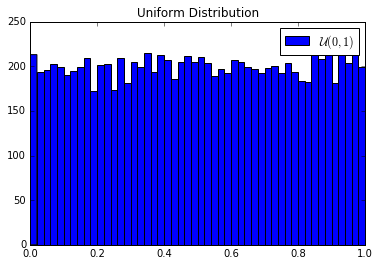

Results from the normal trial
np.mean(N_10_2_arr) =  9.9638288304
np.std(N_10_2_arr) =  2.00274604517


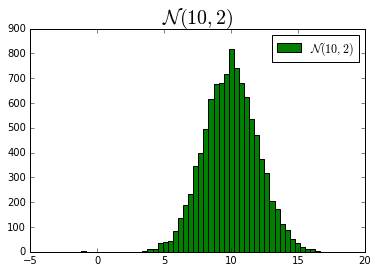


Results for Poisson distribution
np.mean(poisson_arr) =  4.998


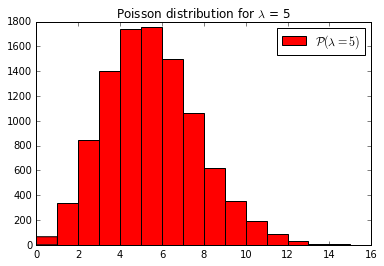

In [266]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### We first start with uniform random distribution (between 0 and 1)
print "Uniform distribution np.random.random() "
print
uniform_ran_arr = np.random.random( 10000 )

#### we can check that the mean value is close to 0.5
print "np.mean(uniform_ran_arr)"
print np.mean(uniform_ran_arr)


#### We can take a look to the histogram (see the histogram section for more details)
print
plt.hist(uniform_ran_arr, bins=50, label=r'$\mathcal{U}(0,1)$')
plt.title('Uniform Distribution')
plt.legend(loc=1)
plt.show()


####### Gaussian/Normal distribution
### The np.rand.randn return a normal reduced and centered trail result (ie N(0,1) ). 
### You can simply multiply by the standard deviation you want and sum the mean value

mu = 10
std = 2.
num_rand = 10000

N_10_2_arr = np.random.randn(num_rand) * std + mu

print "Results from the normal trial"
print "np.mean(N_10_2_arr) = ", np.mean(N_10_2_arr)
print "np.std(N_10_2_arr) = ", np.std(N_10_2_arr)

plt.hist(N_10_2_arr, bins=50,label=r'$\mathcal{N}(10,2)$', color='green')
plt.title(r'$\mathcal{N}(10,2)$', fontsize=20)
plt.legend(loc=1)
plt.show()



##### Poisson distribution : np.rand.poisson()

lam = 5   #### lambda parameter of the poisson distribution (is also the mean ;) 

poisson_arr =   np.random.poisson( lam, num_rand)

print
print "Results for Poisson distribution"
print "np.mean(poisson_arr) = ", np.mean(poisson_arr)

plt.hist(poisson_arr, bins=15, label=r'$\mathcal{P}(\lambda = 5)$', color='red')
plt.title('Poisson distribution for $\lambda$ = '+str(lam))
plt.legend(loc=1)
plt.show()




# Plots

We will only use the matplotlib.pyplot library to do the plots here. It is the most used one, produce nice plots and is easy to use. For some specific plots, you will maybe use another library but it should be enougth for this school to use only this one. We have first to import the library and we will use "plt" as obj_name. So all the methods will be call as plt.method

One line very useful to add in Jupyter-notebook is the following:
    
    %matplotlib inline
    
which allow to plot directly inside the internet browser. In order to have interactive plots, you can change to:

    %matplotlib notebook 

All the instruction before the command "plt.show()" will be interpretated as part of the same figure.


### plt.plot()

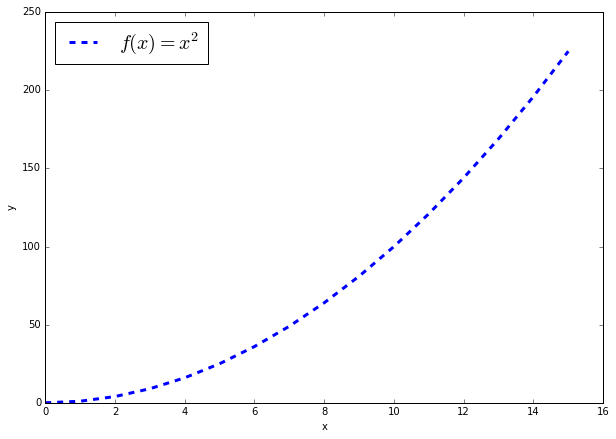

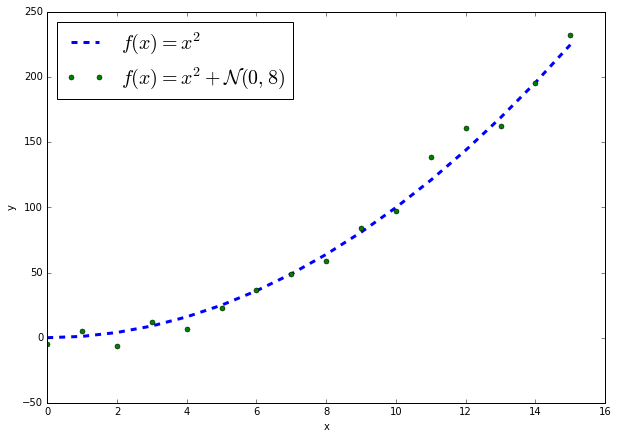

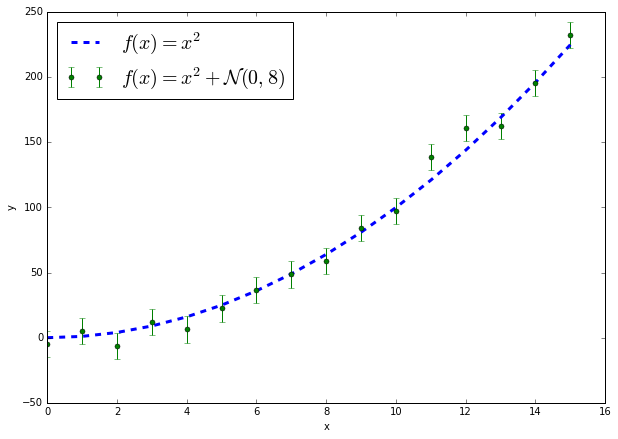

In [306]:
import matplotlib.pyplot as plt
%matplotlib inline

x_arr = np.linspace(0., 15., 16)
y_arr = x_arr**2
y_spread_arr = y_arr + np.random.randn(len(x_arr))*10

plt.figure(figsize = (10,7))     #### allow to determine some stuff like the size of the figure 
plt.plot(x_arr, y_arr, linestyle='--' , linewidth=3., color='b', label=r'$f(x) = x^2$')   ### label will be use by plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=20, loc=2)
plt.show()


plt.figure(figsize = (10,7))     #### allow to determine some stuff like the size of the figure 
plt.plot(x_arr, y_arr, linestyle='--' , linewidth=3., color='b', label=r'$f(x) = x^2$')   ### label will be use by plt.legend()
plt.plot(x_arr, y_spread_arr, marker='o',markersize=5, linestyle='none'
          , color='g', label=r'$f(x) = x^2 + \mathcal{N}(0,8)$')   ### label will be use by plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=20, loc=2)
plt.show()


##### ADD ERROR BARS. Here, I had a gaussian noise with standard deviation = 10 (is  np.zeros(len(x_arr))+10.)


plt.figure(figsize = (10,7))     #### allow to determine some stuff like the size of the figure 
plt.plot(x_arr, y_arr, linestyle='--' , linewidth=3., color='b', label=r'$f(x) = x^2$')   ### label will be use by plt.legend()
plt.errorbar(x_arr, y_spread_arr, np.zeros(len(x_arr))+10. , marker='o',markersize=5, linestyle='none'
          , color='g', label=r'$f(x) = x^2 + \mathcal{N}(0,8)$')   ### label will be use by plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=20, loc=2)
plt.show()



## pcolormesh, contour and surface

In order to plot a 3D results, there are different methods we can use.
The easiest method is plt.pcolormesh.
We can add contours to the pcolormesh, or directly plot the contours on a white background

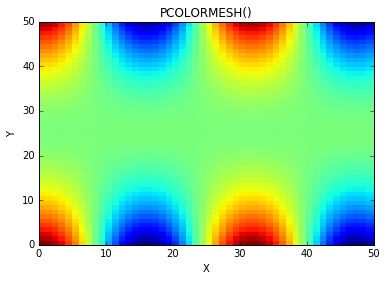

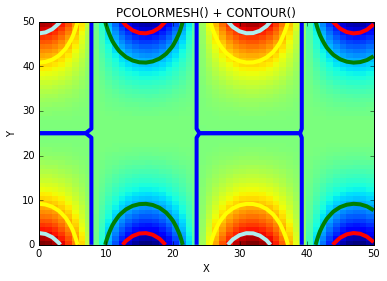

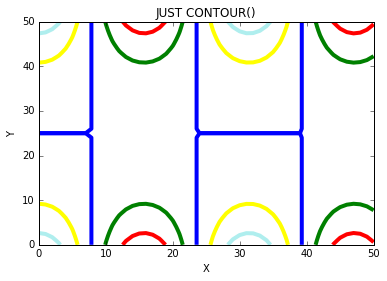

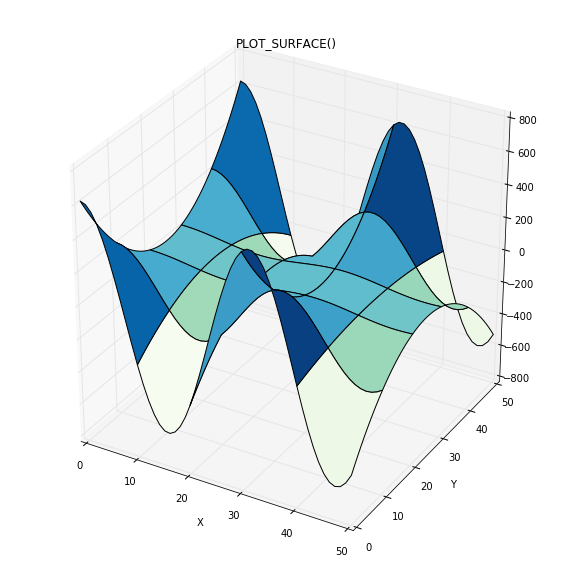

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline


x_arr = np.linspace(0., 50., 51)
y_arr = np.linspace(0., 50., 51)

X,Y = np.meshgrid(x_arr, y_arr)  #### create a 2D grid. X and Y are a 2D grid with each time the x_arr value in X and the y_arr valur in Y

Z_grid = (X-25)**2 *np.cos(Y/5.)



### We can plot a 2D density map with pcolormesh()
plt.pcolormesh(x_arr, y_arr, Z_grid.T, cmap = 'jet')
plt.title('PCOLORMESH()')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### We can look for the contours values with contour()
plt.pcolormesh(x_arr, y_arr, Z_grid.T, cmap = 'jet')
plt.contour(x_arr, y_arr, Z_grid.T, 6,
                 linewidths=np.zeros(6)+4, colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', 'gold'))
plt.title('PCOLORMESH() + CONTOUR()')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.contour(x_arr, y_arr, Z_grid.T, 6,
                 linewidths=np.zeros(6)+4, colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', 'gold'))
plt.title('JUST CONTOUR()')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## we can see the 3D-shape of Z using plot_surface()
## In order to do that, we have to load Axes3D from mpl_toolkits.mplot3d
## Generate a figure with a '3d' projection and attach it to an object : here 'ax'
## then, we have to use 'ax' rather than 'plt' and use the methods associated. 
## The name of the methods change a bit like 'xlabel' -> 'set_xlablel' ....

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10) )
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(X, Y, Z_grid.T, cmap = 'GnBu')
ax.set_title('PLOT_SURFACE()')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## histograms

Histograms are useful in order to access to the probability distribution of a variable. We will see here how to generate it and the use the result to generate the Cumulative Distribution Function.
The plt.histogram is not just a plotting function but also return the results you need to use the PDF.

As an exercise, you will generate a random trial following a given distribution.

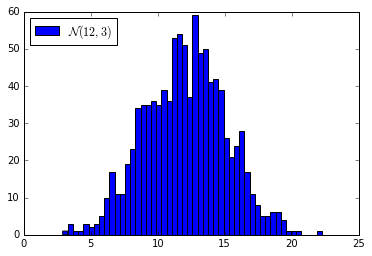

[  1.   3.   1.   1.   3.   2.   3.   5.  10.  17.  11.  11.  19.  23.  34.
  35.  35.  36.  35.  39.  36.  53.  54.  51.  37.  59.  49.  50.  41.  42.
  39.  26.  21.  24.  28.  17.  11.   8.   5.   5.   6.   6.   4.   1.   1.
   1.   0.   0.   0.   1.]
[  2.90274649   3.29033656   3.67792663   4.0655167    4.45310677
   4.84069684   5.22828691   5.61587698   6.00346705   6.39105712
   6.77864719   7.16623726   7.55382733   7.94141741   8.32900748
   8.71659755   9.10418762   9.49177769   9.87936776  10.26695783
  10.6545479   11.04213797  11.42972804  11.81731811  12.20490818
  12.59249825  12.98008832  13.36767839  13.75526846  14.14285854
  14.53044861  14.91803868  15.30562875  15.69321882  16.08080889
  16.46839896  16.85598903  17.2435791   17.63116917  18.01875924
  18.40634931  18.79393938  19.18152945  19.56911952  19.9567096
  20.34429967  20.73188974  21.11947981  21.50706988  21.89465995
  22.28225002]
[  3.09654152   3.48413159   3.87172166   4.25931173   4.6469018
   5.0

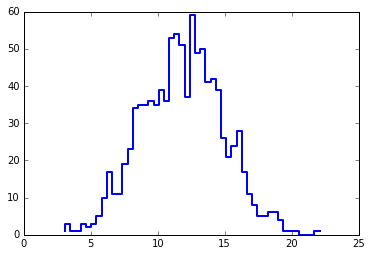

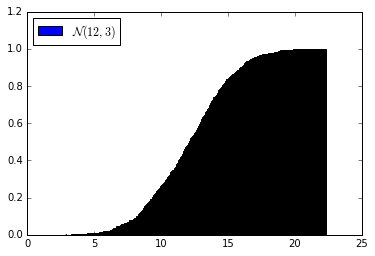

Distribution using the CDF of the first one and a uniform random trial


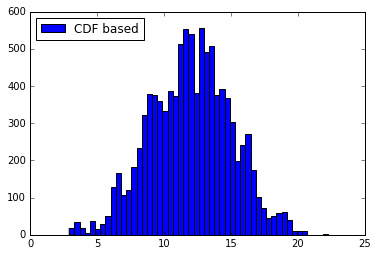

In [271]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### generate a random distribution followinga gaussian distribution N(12, 3)
rand_arr = np.random.randn(1000)*3. + 12.

hx = plt.hist(rand_arr, bins=50, label=r'$\mathcal{N}(12,3)$')
plt.legend(loc=2)
plt.show()


print hx[0]    ### COUNT values from the histogram
print hx[1]    

edges_arr = hx[1]
x_arr = (edges_arr[1 : len(edges_arr)] + edges_arr[0 : len(edges_arr)-1])/2
print x_arr


plt.plot(x_arr, hx[0], drawstyle = 'steps' , lw=2)
plt.show()



#### We can also use the keywords "normed" and "cumulative" in order to normalize the sum to 1
#### and obtain directly the cumultaive distribution function


cx = plt.hist(rand_arr, bins=500, label=r'$\mathcal{N}(12,3)$', cumulative=True, normed=True)
plt.legend(loc=2)
plt.show()

edges_arr = cx[1]
x_arr = (edges_arr[1 : len(edges_arr)] + edges_arr[0 : len(edges_arr)-1])/2
cumul_arr = np.array(cx[0])


##### Use the cumulative distribution function to generate a new distribution following this one
##### Becareful, if you know the exact PDF, you have to use it. 
##### This procedure is only if you do not know what is the underlying PDF


rand2_arr = np.zeros( num_rand )   #### array in which we will storage the values
uni_trial = np.random.random(num_rand)   ### array with uniform random distribution 

for ii in range(num_rand):
    
    rand2_arr[ii] = x_arr[  np.argmin( np.abs( cumul_arr - uni_trial[ii] ) )  ]
    ##### EXPLANATION ####
    ### np.abs( cumul_arr - uni_trial[ii] ) = absolute difference between CDF and uniform random trial
    ### np.argmin( np.abs( cumul_arr - uni_trial[ii] ) ) = give the index where we have the minimum difference
    ### Then, we take the corresponding x_arr value which correspond to the random value following the CDF for this uni_trial value

    
    
    
    
print "Distribution using the CDF of the first one and a uniform random trial"    
hx = plt.hist(rand2_arr, bins=50, label='CDF based')
plt.legend(loc=2)
plt.show()

## Read, Write

In order to read/write a file, we need to use file format

In [299]:
#### READ a file using "open"

f = open('Example_chi2.txt')


### read the first line
print f.readline()
print
### read the second line
print f.readline()
print
### read the third line
print f.readline()
print


#### the results are strings and you have to parse the information you need. That's powerful but not straightforward
#### I show a simple example to parse the values from the first line

f.close()
f = open('Example_chi2.txt', "r")   #### "r" stipulate "read mode"


print
print

res = f.readline()
res_arr =  str.split(res, ';')  #### create a list of strings. Note the last one hav '\n' corresponding to the "return" instruction
float_arr = np.zeros( len(res_arr) )
for ii in range(len(res_arr)): 
    print res_arr[ii]
    float_arr[ii] = float(res_arr[ii])
    
print "Values inside the float_arr :"
print float_arr




###### WRITE #####

###that's similar to read. You have to think when you want return to the next line and add '\n'
## first you have to create a string with all the information you want

a=12
b=18
c=54.2456

f.close()
f = open('File_write_abc.txt', "w" )  #### "w" stipulate "write mode"

line = "a="+str(a)+"\n"
f.write(line)
line = "b="+str(b)+"\n"
f.write(line)
line = "c="+str(c)+"\n"
f.write(line)

f.close()

0.000000000000000000e+00;1.000000000000000000e+00;2.000000000000000000e+00;3.000000000000000000e+00;4.000000000000000000e+00;5.000000000000000000e+00;6.000000000000000000e+00;7.000000000000000000e+00;8.000000000000000000e+00;9.000000000000000000e+00


4.612618665657789663e+00;-3.892570486953177422e-01;7.102362189418808036e+00;5.714333619359340588e+00;3.071351219109024200e+00;1.092649212498456635e+01;7.578685217169653043e+00;1.059110118435943271e+01;3.192627417444101390e+00;2.520350222596428047e+00


4.750622469261045921e+00;4.472168878240328382e+00;2.420334386450053277e+00;3.259615392696589620e+00;4.844055631041878307e+00;3.785316365824176188e+00;2.593762725340805542e+00;2.207925027505885041e+00;3.128420135953553061e+00;4.061341864128669599e+00




0.000000000000000000e+00
1.000000000000000000e+00
2.000000000000000000e+00
3.000000000000000000e+00
4.000000000000000000e+00
5.000000000000000000e+00
6.000000000000000000e+00
7.000000000000000000e+00
8.000000000000000000e+00
9.00000000000000

## Numpy Loadtxt and Savetxt methods

A very powerful methods to read and write files of data is to use numpy.loadtxtx and numpy.savetxt()

In [283]:
import numpy as np

### you can read and store arrays directly as

x,y,err = np.loadtxt('Example_chi2.txt', delimiter=';')   #### this file was generated in python format
np.savetxt('Example_chi2_transpose.txt', np.transpose(( x,y,err )),
           header = '       X                           Y                      ERR' )

#### take a look to the new file.

###You can also read the file in one block which will store in a 2D ndarray

data = np.loadtxt('Example_chi2_transpose.txt').T    #### because we store in transpose, it is better to read in transpose
print data[0, :]   ### X array
print data[1, :]   ### Y array
print data[2, :]   ### errors


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[  4.61261867  -0.38925705   7.10236219   5.71433362   3.07135122
  10.92649212   7.57868522  10.59110118   3.19262742   2.52035022]
[ 4.75062247  4.47216888  2.42033439  3.25961539  4.84405563  3.78531637
  2.59376273  2.20792503  3.12842014  4.06134186]


## Other useful methods of numpy

One of the method I love with numpy is "**where**" which is similar to the "**where**" of IDL which return the indices of the elements from an array which respect a condition. In fact, np.where() return a tuple of indices. For this reason, we will focus on the first element of this tuple which will contain the array of indices (reason why I use tmp[0] )

Becareful, the logical operators inside np.where() are a bit different: 
    
    or becomes |
    and becomes &
    
numpy provide a large list of methods to obtain useful informations:

    argmin/argmax : give the index of the min/max value of an ndarray
    std           : return standard deviation of the array
    var           : return the variance of the array
    min/max       : return min/max value of the array
    sum           : return the sum of an array
    
    
    
    
   
    
    
    

In [65]:
import numpy as np


#arr1 = np.arange(1., 32., 1.)    ####remember that it will stop at 32.-1.
arr1 = np.linspace(1., 32., 32)
print arr1
arr2 = arr1

tmp = np.where( (arr1 > 3.)  )
print
print "tmp is this tuple"
print tmp
print
print "tmp[0] is this array"
print tmp[0]


print arr1[tmp[0]]


print
print "Multiple conditions"
print


tmp = np.where( (arr1 > 3.) & (arr1 < 14.) )
print tmp

print arr1[tmp[0]]


print
print "Multiple conditions or"
print

tmp = np.where( (arr1 > 3.) & (arr1 < 14.) )
print tmp
print arr1[tmp[0]]

#### Moreover, you can use multiple conditions on different arrays if they have same length
#### That's very useful if the arrays are various observables from the same objects.


See exercise




[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.]

tmp is this tuple
(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),)

tmp[0] is this array
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31]
[  4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.]
(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),)
[  4.   5.   6.   7.   8.   9.  10.  11.  12.  13.]


(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),)
[  4.   5.   6.   7.   8.   9.  10.  11.  12.  13.]
